<a href="https://colab.research.google.com/github/sujeongzoe/KDT/blob/main/%5BHeartAttack_3rd%5D_230419.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Heart Attack
- https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
- outcome : binary value(1: 심장 질환 있는 사람 / 0:그렇지 않다)
- age : 나이
- sex : 성별(1=남성,0=여성)
- cp : 가슴 통증(chest pain) (1=전형적인 협심증, 2= 비전형적인 협심증, 3=협심증이 아닌 통증, 4=무증상)
- trtbps : 안정혈압 (입원시 mmHg)
- chol : 혈청 콜레스테롤(serum cholesterol)(mg/dl)
- fbs : 공복혈당 > 120 mg/dl (1=True, 0=False)
- restecg : 심전도 결과(0=정상, 1=ST-T파 이상)(T파 반전 및 또는 0.05mV 이상의 ST 상승 또는 감소), 2 = Estes 기준에 의해 좌심실 비대증 가능성 또는 유력
- thalachh : 최대 심장 박동수
- exang : 운동으로 인한 협심증(1=yes, 2=no)
- oldpeak : 휴식 대비 운동으로 인한 ST 감소
- slp : 최대 운동 ST 세그먼트 기울기(1=상승 기울기, 2=수평,3=하강 기울기)
- caa : 형광 투시로 착색된 주요 혈관(0-3)
- thal : 탈륨 스트레스 테스트(3=정상, 6=고정 결합, 7=가역적 결함)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('heart.csv')

In [ ]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<Axes: >

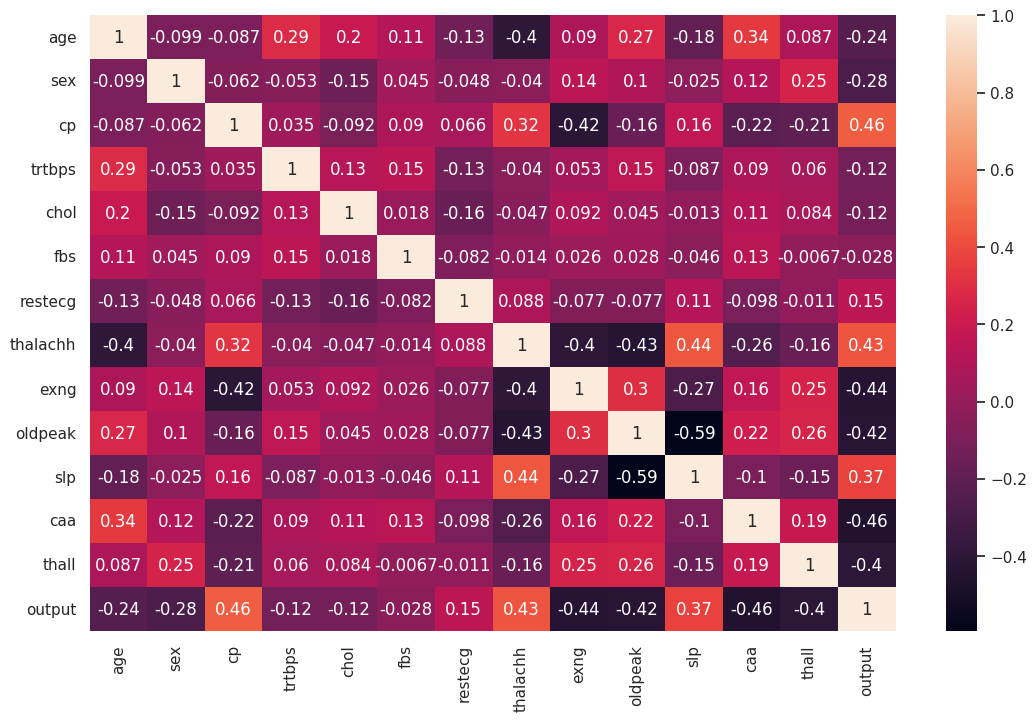

In [ ]:
import seaborn as sns

fig, ax=plt.subplots(1,1, figsize=(13,8))
sns.heatmap(data.corr(method='spearman'), annot=True)

# 피어슨 상관 계수는 선형 상관 관계이지만,
# 스피어만 상관 계수는 상관 관계에 대한 값이다.
# 따라서, 피어슨 상관 계수처럼 두 변수가 꼭 선형적인 관계를 가질 필요가 없다.


# correlation_matrix = data.corr().round(2)
# sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
data.shape

(303, 14)

<Axes: xlabel='trtbps', ylabel='Count'>

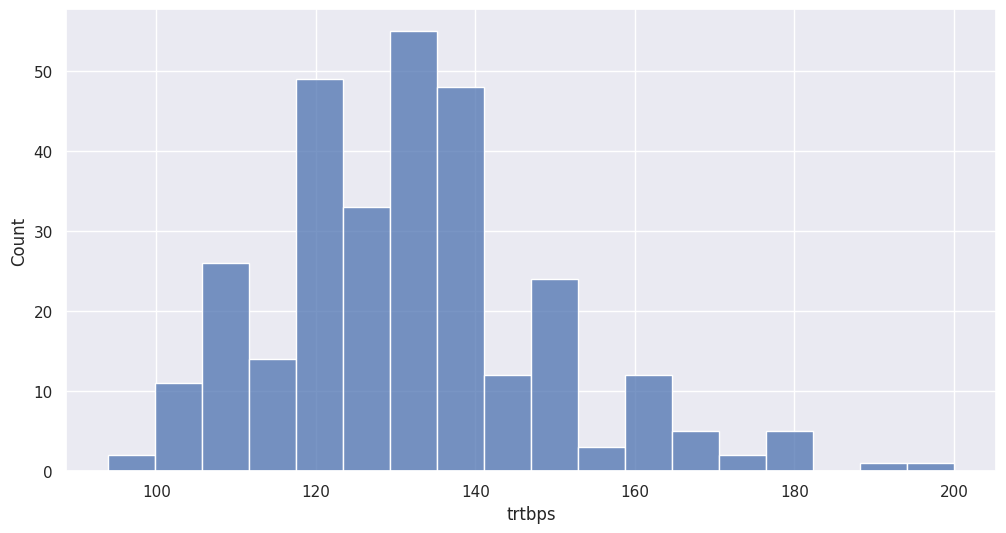

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(x='trtbps',data=data)

<Axes: xlabel='chol', ylabel='Count'>

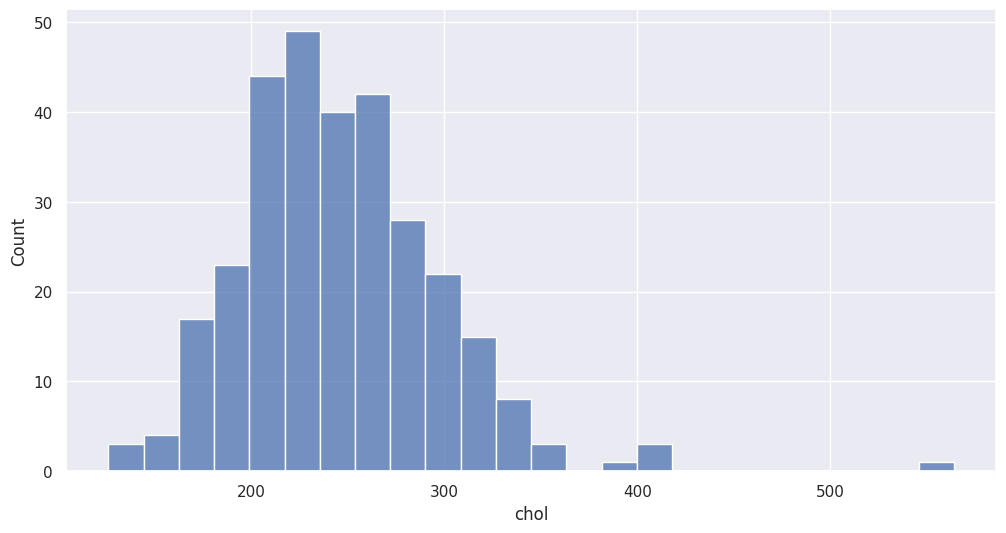

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(x='chol',data=data)

In [ ]:
data['caa'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

In [ ]:
data['thall'].value_counts()

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

In [ ]:
data.shape

(303, 14)

# 데이터 전처리

In [ ]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data[np.abs(data['trtbps'] - data['trtbps'].mean()) > (3*data['trtbps'].std())]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0


In [ ]:
data[np.abs(data['chol'] - data['chol'].mean()) > (3*data['chol'].std())]    # 보수적으로 선택.

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [ ]:
# ‘trtbps’ 3-sigma 이상인 행 -> 드랍
print(data.shape)
idx = data[data['trtbps']>=192].index
data = data.drop(idx)
print(data.shape)

(303, 14)
(301, 14)


In [ ]:
#‘chol’ 500 이상인 행 -> 드랍(3-sigma 이상인 행이 많아서 보수적으로 선택.)
print(data.shape)
idx = data[data['chol']>500].index
data = data.drop(idx)
print(data.shape)

(301, 14)
(300, 14)


In [ ]:
#  ‘caa’ number of major vessels (0-3)인데 caa==4인 행 -> 4와 가까운 3으로 변경
print(data['caa'].value_counts())
data.loc[data['caa']>3, 'caa'] = 3
print(data['caa'].value_counts())

0    174
1     64
2     37
3     20
4      5
Name: caa, dtype: int64
0    174
1     64
2     37
3     25
Name: caa, dtype: int64


In [ ]:
# ‘thall’ thall ==0 인 행 -> 0과 가까운 1로 변경
print(data['thall'].value_counts())
data.loc[data['thall']<1, 'thall'] = 1
print(data['thall'].value_counts())

2    166
3    114
1     18
0      2
Name: thall, dtype: int64
2    166
3    114
1     20
Name: thall, dtype: int64


In [ ]:
df = data
print(data.shape)
print(df.shape)

(300, 14)
(300, 14)


In [ ]:
data1 = data

<Axes: xlabel='trtbps', ylabel='Count'>

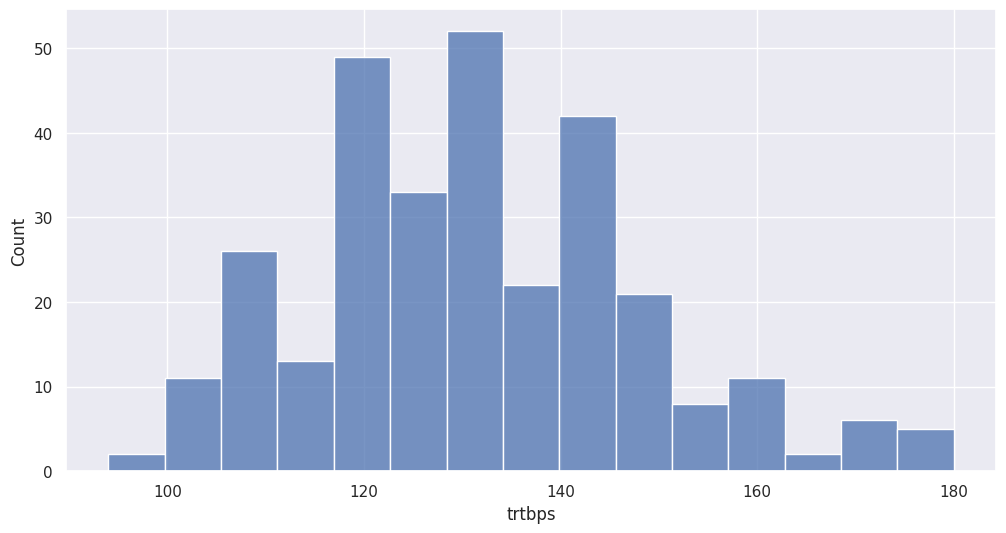

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(x='trtbps',data=data)

<Axes: xlabel='chol', ylabel='Count'>

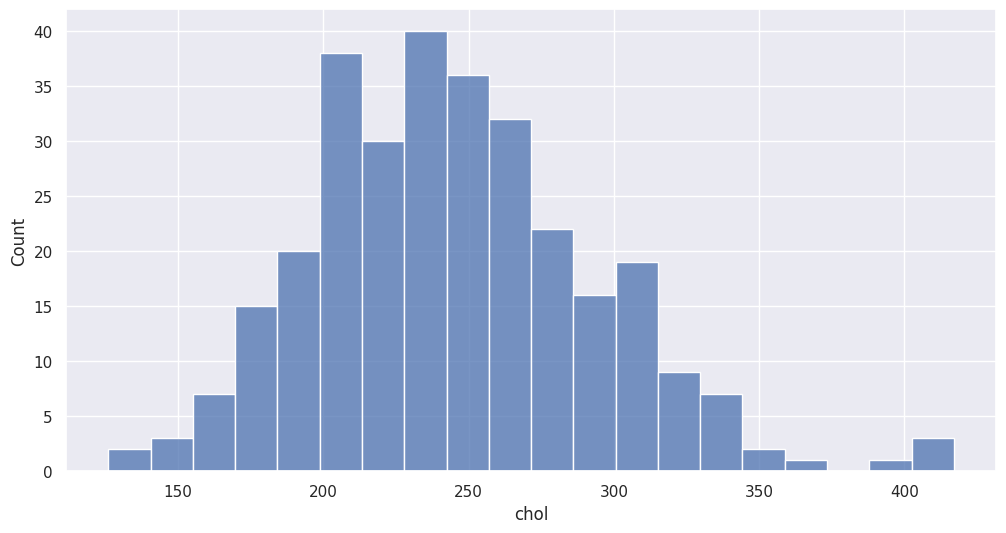

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(x='chol',bins=20,data=data)

<Axes: >

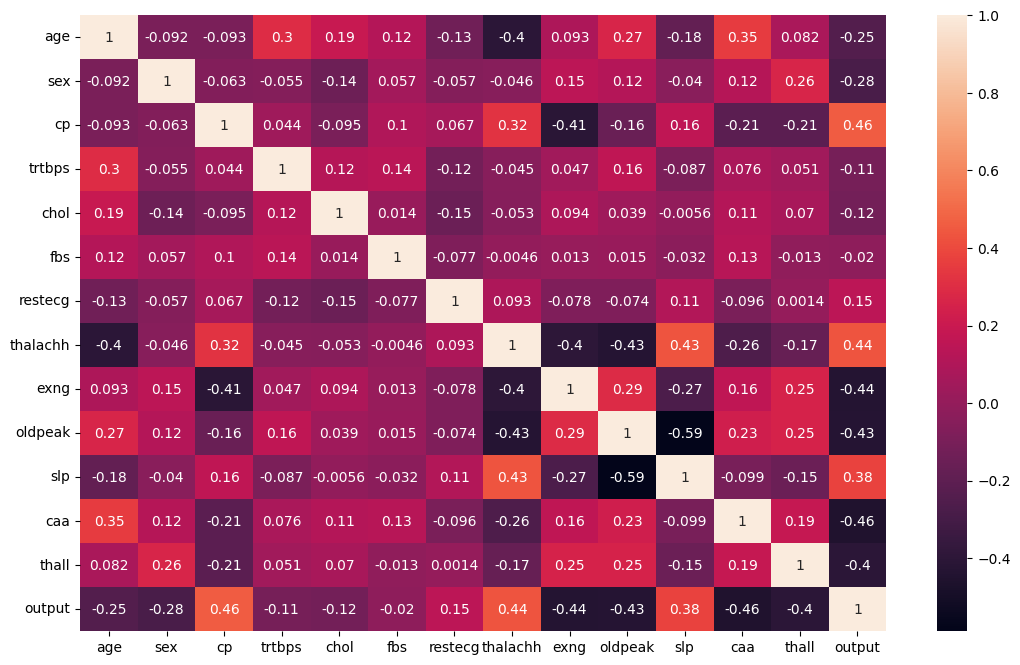

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax=plt.subplots(1,1, figsize=(13,8))
sns.heatmap(data.corr(method='spearman'), annot=True)

# 1) LogisticRegression

In [ ]:
data = pd.get_dummies(df, columns=['cp','restecg','slp','caa','thall'])
data.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,output,cp_0,...,slp_0,slp_1,slp_2,caa_0,caa_1,caa_2,caa_3,thall_1,thall_2,thall_3
0,63,1,145,233,1,150,0,2.3,1,0,...,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,1,0,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,0,1,1,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,1,0,...,0,0,1,1,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,1,...,0,0,1,1,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('output', axis=1)
y = data['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=419)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(225, 25) (225,) (75, 25) (75,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

def grid_search(params, clf=LogisticRegression(random_state=419)):
  grid_clf = GridSearchCV(clf, params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
  grid_clf.fit(X_train, y_train)
  best_params = grid_clf.best_params_
  print('best_param:', best_params)

  best_score = np.sqrt(-grid_clf.best_score_)
  print('best_score;{:.3f}'.format(best_score))

  best_model = grid_clf.best_estimator_
  y_pred = best_model.predict(X_test)
  rmse_test = mean_squared_error(y_test, y_pred)**0.5
  print('RMSE:{:.3f}'.format(rmse_test))

  accuracy = accuracy_score(y_test, y_pred)
  print('예측 정확도 : {0:.4f}'.format(accuracy))

  roc_auc = roc_auc_score(y_test, y_pred)
  print('AUROC: {0:.4f}'.format(roc_auc))

In [ ]:
grid_search(params={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

best_param: {'C': 100}
best_score;0.383
RMSE:0.416
예측 정확도 : 0.8267
AUROC: 0.8164


# 2) DecisionTree

In [ ]:
data = data1  # 전처리 데이터

from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=419)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(225, 13) (225,) (75, 13) (75,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

DT = DecisionTreeClassifier(random_state=419)
scores = cross_val_score(DT, X, y, cv=5)
print('정확도: ', np.round(scores, 2))
print('정확도 평균 : %0.2f' %(scores.mean()))

정확도:  [0.78 0.82 0.78 0.72 0.72]
정확도 평균 : 0.76


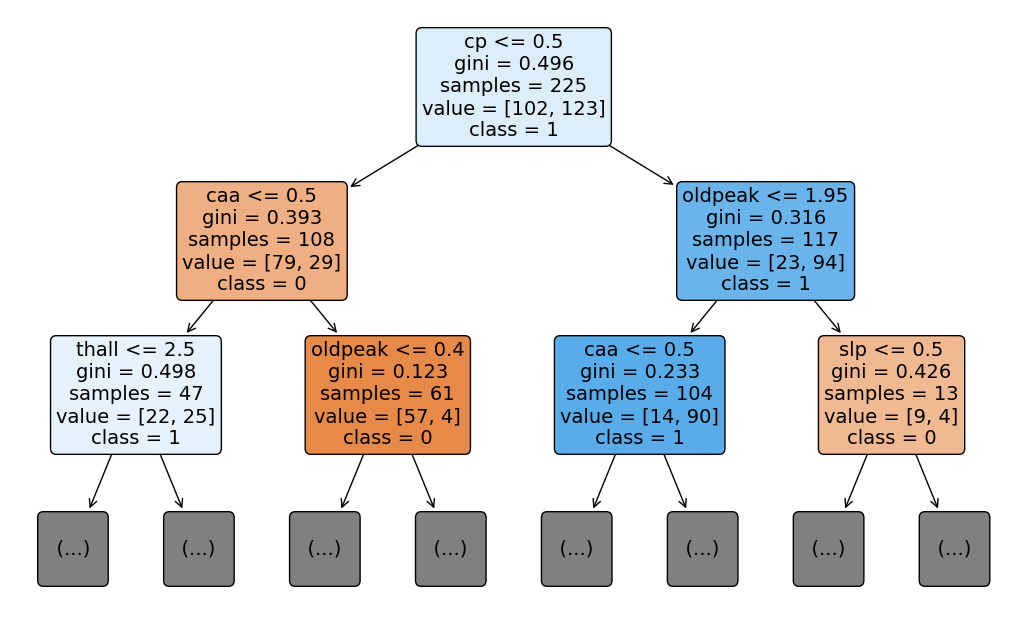

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

DT.fit(X_train, y_train)
plt.figure(figsize=(13,8))
plot_tree(DT, max_depth=2, feature_names=list(X.columns), class_names=['0', '1'],
          filled=True, rounded=True, fontsize=14)
plt.show()

<BarContainer object of 13 artists>

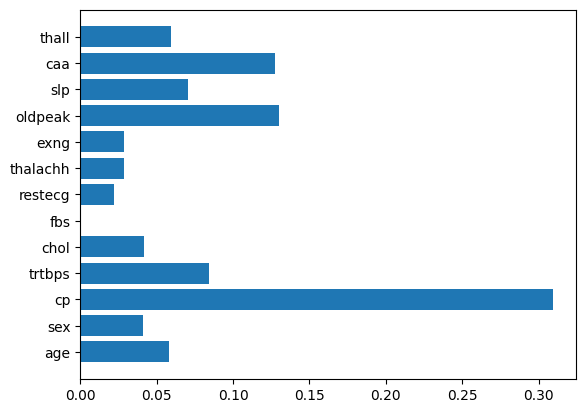

In [ ]:
# feature_importances
DT.fit(X_train, y_train)
import matplotlib.pyplot as plt

plt.barh(X.columns, DT.feature_importances_, align='center')

In [ ]:
# shap value : 실제값과 예측값의 차이. 특정 관측치의 실제 예측치와 평균 예측치의 평균적인 차이를 의미.

# !pip install shap

# import skimage
# skimage.__version__

# !pip install --upgrade scikit-image

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 8.4 MB/s eta 0:00:00


In [ ]:
import skimage
skimage.__version__

'0.19.3'

In [ ]:
!pip install --upgrade scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 13.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3


In [ ]:
import shap
explainer = shap.Explainer(DT, X)
expected

In [ ]:
import shap
explainer = shap.TreeExplainer(DT)   # Tree model shap value 객체 지정
shap_values = explainer.shap_values(X_test)

In [ ]:
type(shap_values)

list

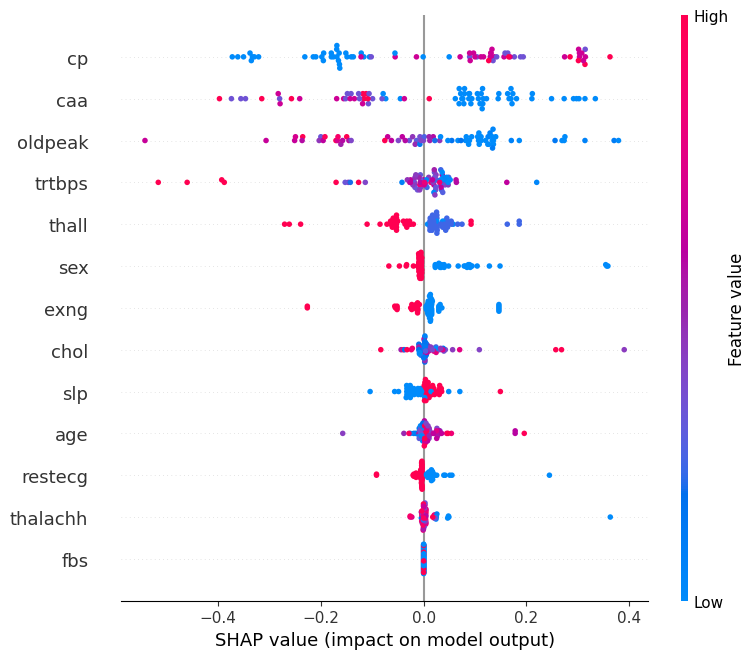

In [ ]:
shap.summary_plot(shap_values[1], X_test)  # 겹쳐있는 보라색 부분은 bins를 조정해서 범위를 좁혀서 본다.

In [ ]:
# confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import recall_score, precision_score, roc_curve, precision_recall_curve

def get_clf_eval(y_test=None, pred=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)

    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [ ]:
y_pred = DT.predict(X_test)
get_clf_eval(y_test, y_pred)

오차 행렬
[[19 15]
 [ 9 32]]
정확도: 0.6800, 정밀도: 0.6809, 재현율: 0.7805,F1: 0.7273, AUC: 0.6697


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.56      0.61        34
           1       0.68      0.78      0.73        41

    accuracy                           0.68        75
   macro avg       0.68      0.67      0.67        75
weighted avg       0.68      0.68      0.68        75



Confusion matrix, without normalization
[[24 10]
 [10 30]]
Normalized confusion matrix
[[0.71 0.29]
 [0.25 0.75]]


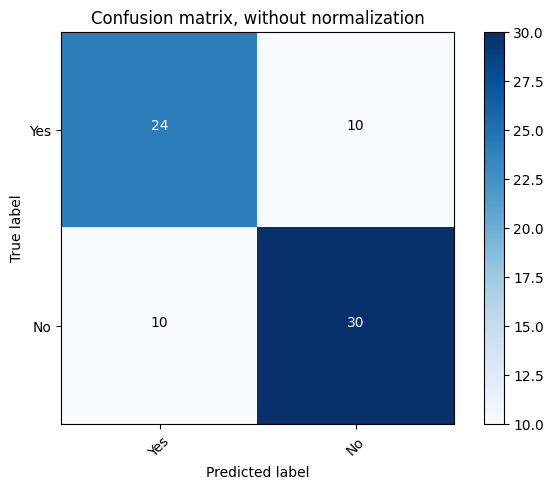

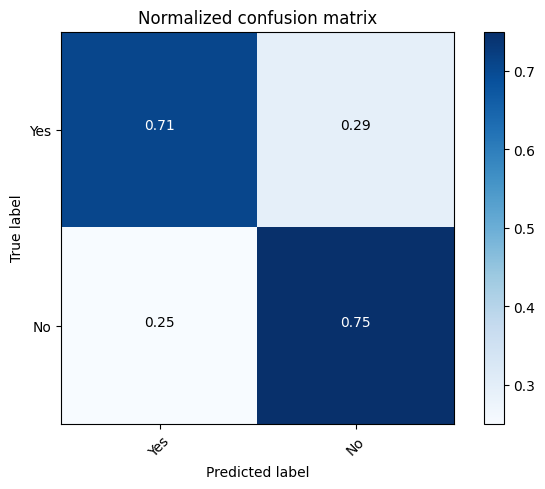

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

class_names = ['Yes', 'No']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

# 3) RandomForest

In [ ]:
data = data1

from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=419)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(225, 13) (225,) (75, 13) (75,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10, random_state=419, n_jobs=-1)
scores = cross_val_score(forest, X_test, y_test, cv=5)

print('정확도:', np.round(scores, 3))
print('정확도의 평균: %0.3f' %(scores.mean()))

정확도: [0.6   0.8   0.8   0.8   0.867]
정확도의 평균: 0.773


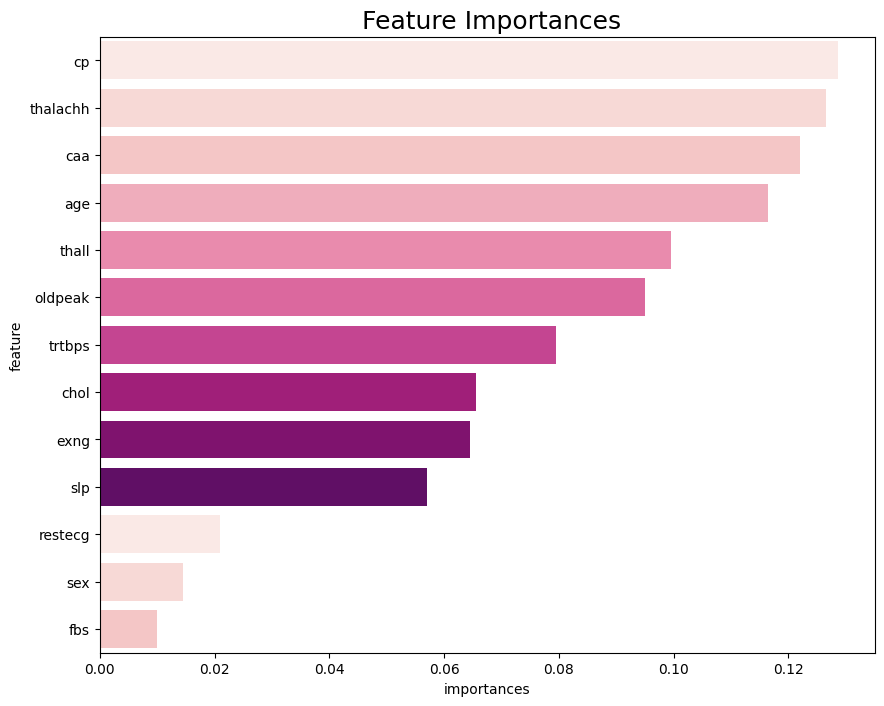

In [ ]:
import seaborn as sns

forest.fit(X_train, y_train)
importance = forest.feature_importances_
feature = X_train.columns
importances = pd.DataFrame()
importances['feature'] = feature
importances['importances'] = importance
importances.sort_values('importances', ascending=False, inplace=True)
importances.reset_index(drop=True, inplace=True)
# print(importances)

plt.figure(figsize=(10, 8))
sequential_colors = sns.color_palette("RdPu", 10)
sns.barplot(x='importances', y='feature',palette=sequential_colors,data=importances)
plt.title(' Feature Importances', fontsize=18)
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


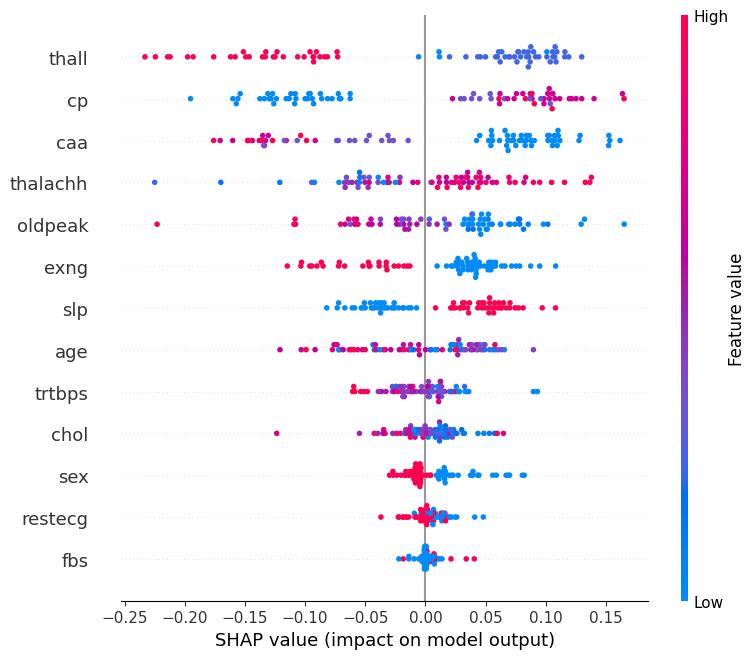

In [ ]:
import shap
explainer = shap.TreeExplainer(forest)   # Tree model shap value 객체 지정
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import recall_score, precision_score, roc_curve, precision_recall_curve

def get_clf_eval(y_test=None, pred=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)

    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


<BarContainer object of 13 artists>

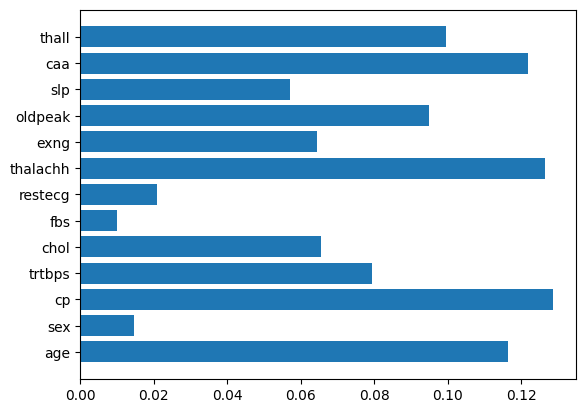

In [ ]:
forest.fit(X_train, y_train)
plt.barh(X.columns, forest.feature_importances_, align='center')

In [ ]:
y_pred = forest.predict(X_test)
print(get_clf_eval(y_test, y_pred))
print(classification_report(y_test, y_pred))

오차 행렬
[[25  9]
 [ 7 34]]
정확도: 0.7867, 정밀도: 0.7907, 재현율: 0.8293,F1: 0.8095, AUC: 0.7823
None
              precision    recall  f1-score   support

           0       0.78      0.74      0.76        34
           1       0.79      0.83      0.81        41

    accuracy                           0.79        75
   macro avg       0.79      0.78      0.78        75
weighted avg       0.79      0.79      0.79        75



In [ ]:
# oob_scores (Out of bags) : 훈련 종료 후 oob 샘플을 기반으로 평가를 수행.
# -> 정확도를 평가할 또 다른 방법인듯..!
#     랜덤 포레스트는 중복을 허용한 샘플링인 배깅을 통해 결정 트리를 만듭니다. 모든 샘플 중 일부 샘플은 선택되지 않고 남아 있게 됨. -> 이런 샘플을 테스트 세트로 사용할 수 있음.
#     oob_scores = True로 설정하면 랜덤 포레스트 모델을 훈련한 후 각 트리에서 사용되지 않은 샘플을 사용해 개별 트리의 예측 점수를 누적하여 평균을 냄

In [ ]:
forest_1 = RandomForestClassifier(oob_score=True, n_estimators=10, random_state=419, n_jobs=-1)

forest_1.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest_1.score(X_train, y_train)) )
print("테스트 세트 정확도: {:.3f}".format(forest_1.score(X_test, y_test)) )
print("OOB 샘플의 정확도: {:.3f}".format(forest_1.oob_score_) )

훈련 세트 정확도: 0.987
테스트 세트 정확도: 0.787
OOB 샘플의 정확도: 0.822


- hyperparametr tuning

In [ ]:
# forest_1 : n_estimators = [10, 50, 100]

In [ ]:
forest_1 = RandomForestClassifier(oob_score=True, n_estimators=10, random_state=419, n_jobs=-1)
forest_1.fit(X_train, y_train)
forest_1.oob_score_

0.7488584474885844

In [ ]:
forest_1 = RandomForestClassifier(oob_score=True, n_estimators=50, random_state=419, n_jobs=-1)
forest_1.fit(X_train, y_train)
print("테스트 세트 정확도: {:.3f}".format(forest_1.score(X_test, y_test)) )
print("OOB 샘플의 정확도: {:.3f}".format(forest_1.oob_score_) )

테스트 세트 정확도: 0.800
OOB 샘플의 정확도: 0.853


In [ ]:
forest_1 = RandomForestClassifier(oob_score=True, n_estimators=100, random_state=419, n_jobs=-1)
forest_1.fit(X_train, y_train)
print("테스트 세트 정확도: {:.3f}".format(forest_1.score(X_test, y_test)) )
print("OOB 샘플의 정확도: {:.3f}".format(forest_1.oob_score_) )

테스트 세트 정확도: 0.813
OOB 샘플의 정확도: 0.840


In [ ]:
forest_1 = RandomForestClassifier(oob_score=True, n_estimators=250, random_state=419, n_jobs=-1)
forest_1.fit(X_train, y_train)
print("테스트 세트 정확도: {:.3f}".format(forest_1.score(X_test, y_test)) )
print("OOB 샘플의 정확도: {:.3f}".format(forest_1.oob_score_) )

테스트 세트 정확도: 0.827
OOB 샘플의 정확도: 0.853


In [ ]:
# warm_start
#     랜덤 포레스트는 랜덤 포레스트의 트리 갯수(n_estimators)를 결정하는데 도움이 됨.
#     warm_start = True로 지정하면 처음부터 시작하지 않고 트리를 앙상블에 추가할 수 있음.
#     n_estimators를 100에서 200으로 바꾸면 200개의 트리를 가진 랜덤 포레스트를 만드는데 두 배 오래 걸림.
#     warm_start = True로 지정하면 처음부터 200개의 트리를 다시 만들지 않고 이전 모델에 이어서 트리를 추가함.
#     warm_start를 매개변수로 사용해 n_estimators에 따라 OOB점수 변화를 그래프로 그릴 수 있음.

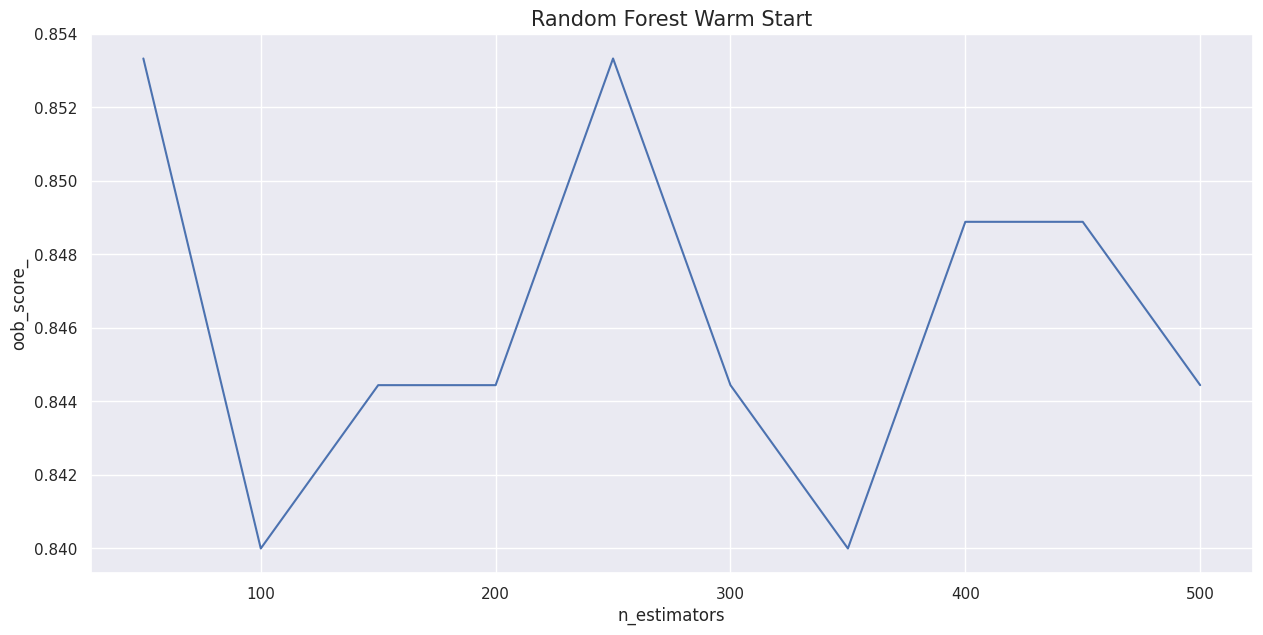

In [ ]:
sns.set()
oob_scores = []

forest_1 = RandomForestClassifier(warm_start=True,
                                  oob_score=True,
                                  n_estimators=50, random_state=419, n_jobs=-1)
forest_1.fit(X_train, y_train)
oob_scores.append(forest_1.oob_score_)

est = 50
estimators=[est]

for i in range(9):
  est += 50
  estimators.append(est)

  forest_1.set_params(n_estimators=est)
  forest_1.fit(X_train, y_train)
  oob_scores.append(forest_1.oob_score_)


plt.figure(figsize=(15,7))
plt.plot(estimators, oob_scores)
plt.xlabel('n_estimators')
plt.ylabel('oob_score_')
plt.title('Random Forest Warm Start', fontsize=15)
plt.show()


# n_estimators = 250이 최적?!

In [ ]:
# **RandomizedSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

def randomized_search_clf(params, runs=20,
                          clf=RandomForestClassifier(random_state=419, n_jobs=-1)):
  rand_clf = RandomizedSearchCV(clf, params, n_iter=runs,
                                cv=5, n_jobs=-1, random_state=2)
  rand_clf.fit(X_train, y_train)
  best_model = rand_clf.best_estimator_
  best_params = rand_clf.best_params_
  best_score = rand_clf.best_score_

  y_pred = best_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  rmse_test = mean_squared_error(y_test, y_pred)**0.5

  print("최상의 매개변수:", best_params)
  print('훈련 점수: {:.3f}'.format(best_score))
  print('정확도: {:.3f}'.format(accuracy))
  print('테스트 점수: {:.3f}'.format(rmse_test))

  return best_model

In [ ]:
# RandomForestClassifier 매개변수 공부 후 RandomSearchCV 돌려보기기

randomized_search_clf(
    # params={'min_samples_leaf':[1,2,4,6,8,10,20,30],
    #         'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
    #         'max_features':['sqrt', 0.8, 0.7, 0.6, 0.5, 0.4],
    #         'max_depth':[None,4,6,8,10,12,15,20],
            'n_estimators':[150]},
            runs=20)

# 4) GradientBoostingClassifier

- GradientBoostingClassifier의 경우 클래스별로 각 트리의 예측을 더한 후 시그모이드 함수를 적용하여 예측 확률을 계산합니다.

In [ ]:
data = data1

from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=419)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(225, 13) (225,) (75, 13) (75,)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error as MSE

gbc = GradientBoostingClassifier(max_depth=2, n_estimators=10,
                                 random_state=419, learning_rate=1.0)

gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
score = accuracy_score(y_pred, y_test)

print('정확도 점수: ' + str(score))
print('RMSE:', MSE(y_test, y_pred)**0.5)

정확도 점수: 0.7733333333333333
RMSE: 0.4760952285695233


In [ ]:
# CV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

gbc = GradientBoostingClassifier(max_depth=2, n_estimators=10,
                                 random_state=419, learning_rate=1.0)
scores = cross_val_score(gbc, X, y, cv=5)
print('정확도: ', np.round(scores, 2))
print('정확도 평균 : %0.2f' %(scores.mean()))

정확도:  [0.85 0.92 0.82 0.78 0.77]
정확도 평균 : 0.83


<BarContainer object of 13 artists>

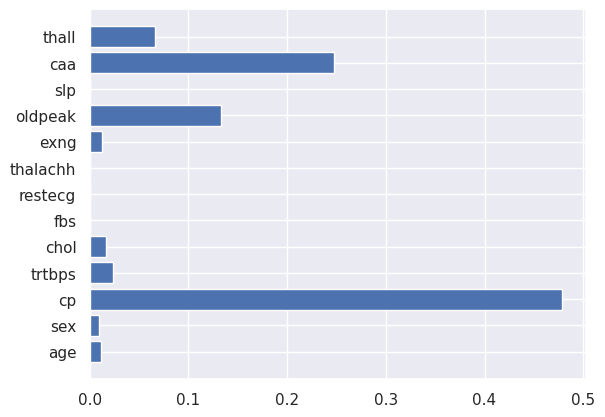

In [ ]:
gbc.fit(X_train, y_train)

plt.barh(X.columns, gbc.feature_importances_, align='center')

In [ ]:
y_pred = gbc.predict(X_test)
print(get_clf_eval(y_test, y_pred))
print(classification_report(y_test, y_pred))

오차 행렬
[[24 10]
 [ 5 36]]
정확도: 0.8000, 정밀도: 0.7826, 재현율: 0.8780,F1: 0.8276, AUC: 0.7920
None
              precision    recall  f1-score   support

           0       0.83      0.71      0.76        34
           1       0.78      0.88      0.83        41

    accuracy                           0.80        75
   macro avg       0.81      0.79      0.79        75
weighted avg       0.80      0.80      0.80        75



- hyperparameter tuning

In [ ]:
# learning_rate
#    개별 트리의 영향을 제한.
#    일반적으로 트리 개수인 n_estimators를 늘리면 learning_rate는 줄여야 함.

In [ ]:
learning_rate_values = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 1.0]
for value in learning_rate_values:
    gbc = GradientBoostingClassifier(max_depth=1, random_state=419,
                                     learning_rate=value)
    gbc.fit(X_train, y_train)
    y_pred = gbc.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    print('학습률:', value, ', 점수:', score)

# lr = 0.2

학습률: 0.001 , 점수: 0.5466666666666666
학습률: 0.01 , 점수: 0.7866666666666666
학습률: 0.05 , 점수: 0.7733333333333333
학습률: 0.1 , 점수: 0.8
학습률: 0.15 , 점수: 0.8
학습률: 0.2 , 점수: 0.8133333333333334
학습률: 0.3 , 점수: 0.7866666666666666
학습률: 0.5 , 점수: 0.7866666666666666
학습률: 1.0 , 점수: 0.7466666666666667


In [ ]:
# n_estimators 변경해가며..

In [ ]:
learning_rate_values = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 1.0]
for value in learning_rate_values:
    gbc = GradientBoostingClassifier(max_depth=1, n_estimators=10,
                                     random_state=419, learning_rate=value)
    gbc.fit(X_train, y_train)
    y_pred = gbc.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    rmse = MSE(y_test, y_pred)**0.5
    print('학습률:', value, ', 점수:', score,', RMSE:', rmse)


학습률: 0.001 , 점수: 0.5466666666666666 , RMSE: 0.6733003292241385
학습률: 0.01 , 점수: 0.5466666666666666 , RMSE: 0.6733003292241385
학습률: 0.05 , 점수: 0.7333333333333333 , RMSE: 0.5163977794943222
학습률: 0.1 , 점수: 0.7866666666666666 , RMSE: 0.46188021535170065
학습률: 0.15 , 점수: 0.7866666666666666 , RMSE: 0.46188021535170065
학습률: 0.2 , 점수: 0.8 , RMSE: 0.4472135954999579
학습률: 0.3 , 점수: 0.76 , RMSE: 0.4898979485566356
학습률: 0.5 , 점수: 0.7733333333333333 , RMSE: 0.4760952285695233
학습률: 1.0 , 점수: 0.8 , RMSE: 0.4472135954999579


In [ ]:
learning_rate_values = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 1.0]
for value in learning_rate_values:
    gbc = GradientBoostingClassifier(max_depth=1, n_estimators=50,
                                     random_state=419, learning_rate=value)
    gbc.fit(X_train, y_train)
    y_pred = gbc.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    rmse = MSE(y_test, y_pred)**0.5
    print('학습률:', value, ', 점수:', score,', RMSE:', rmse)

# n_estimators = 50, lr = 0.2

학습률: 0.001 , 점수: 0.5466666666666666 , RMSE: 0.6733003292241385
학습률: 0.01 , 점수: 0.7333333333333333 , RMSE: 0.5163977794943222
학습률: 0.05 , 점수: 0.76 , RMSE: 0.4898979485566356
학습률: 0.1 , 점수: 0.7866666666666666 , RMSE: 0.46188021535170065
학습률: 0.15 , 점수: 0.8133333333333334 , RMSE: 0.43204937989385733
학습률: 0.2 , 점수: 0.8133333333333334 , RMSE: 0.43204937989385733
학습률: 0.3 , 점수: 0.8 , RMSE: 0.4472135954999579
학습률: 0.5 , 점수: 0.8133333333333334 , RMSE: 0.43204937989385733
학습률: 1.0 , 점수: 0.8 , RMSE: 0.4472135954999579


In [ ]:
learning_rate_values = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 1.0]
for value in learning_rate_values:
    gbc = GradientBoostingClassifier(max_depth=1, n_estimators=150,
                                     random_state=419, learning_rate=value)
    gbc.fit(X_train, y_train)
    y_pred = gbc.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    rmse = MSE(y_test, y_pred)**0.5
    print('학습률:', value, ', 점수:', score,', RMSE:', rmse)

학습률: 0.001 , 점수: 0.5466666666666666 , RMSE: 0.6733003292241385
학습률: 0.01 , 점수: 0.7866666666666666 , RMSE: 0.46188021535170065
학습률: 0.05 , 점수: 0.8 , RMSE: 0.4472135954999579
학습률: 0.1 , 점수: 0.8 , RMSE: 0.4472135954999579
학습률: 0.15 , 점수: 0.7866666666666666 , RMSE: 0.46188021535170065
학습률: 0.2 , 점수: 0.7866666666666666 , RMSE: 0.46188021535170065
학습률: 0.3 , 점수: 0.8 , RMSE: 0.4472135954999579
학습률: 0.5 , 점수: 0.7866666666666666 , RMSE: 0.46188021535170065
학습률: 1.0 , 점수: 0.7066666666666667 , RMSE: 0.5416025603090641


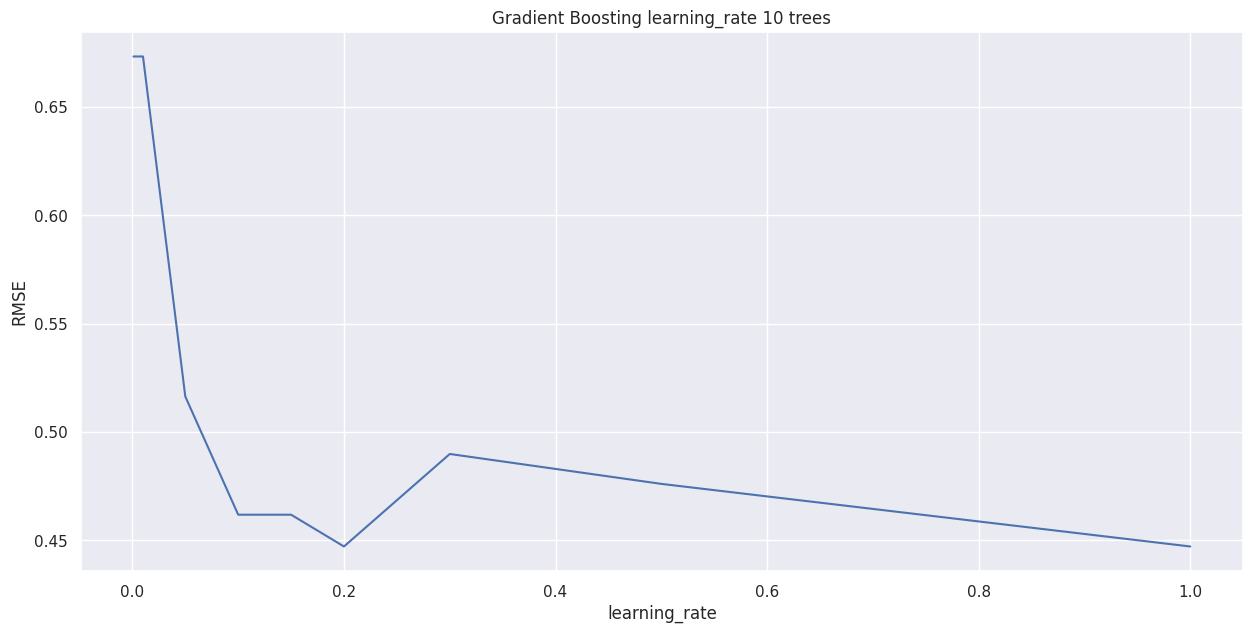

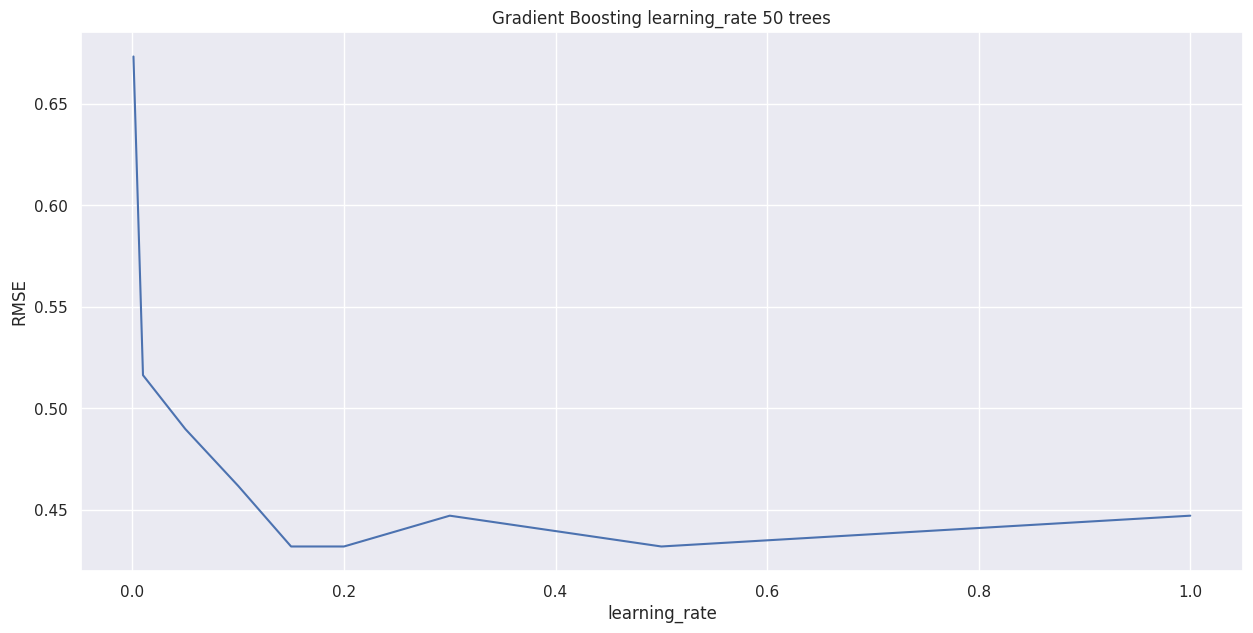

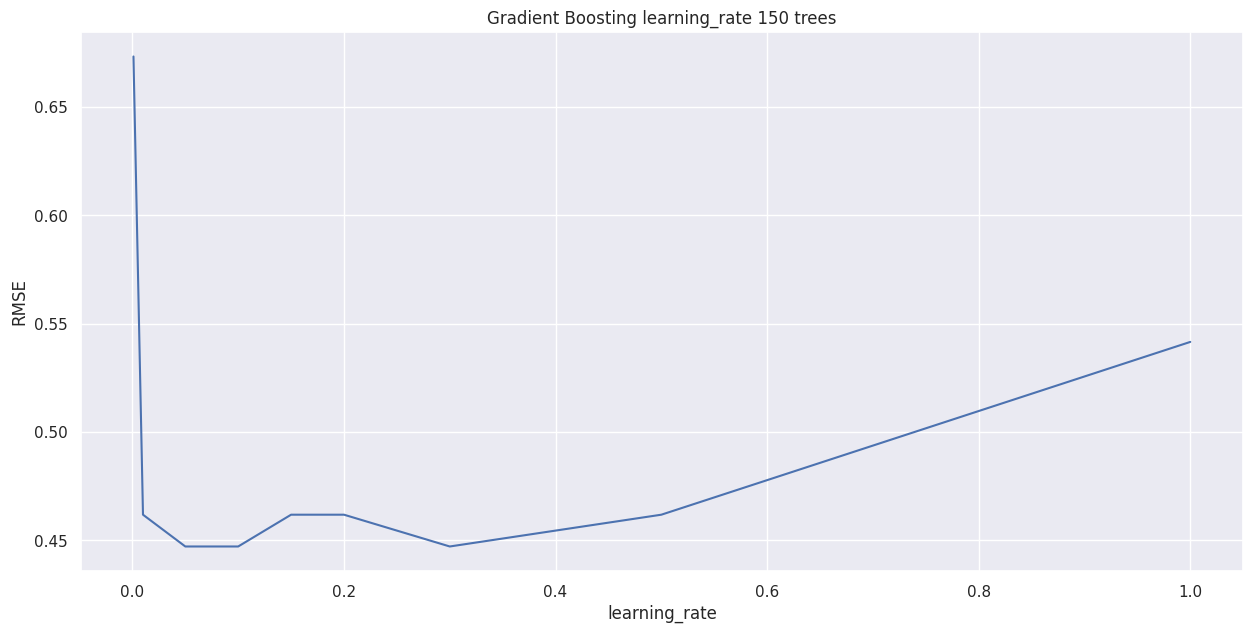

In [ ]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

for est in [10, 50, 150]:
    rmse_scores = []
    for value in learning_rate_values:
        gbc = GradientBoostingClassifier(max_depth=1, n_estimators=est,
                                         random_state=419, learning_rate=value)
        gbc.fit(X_train, y_train)
        y_pred = gbc.predict(X_test)
        rmse = MSE(y_test, y_pred, squared=False)
        rmse_scores.append(rmse)
    plt.figure(figsize=(15,7))
    plt.plot(learning_rate_values, rmse_scores)
    plt.xlabel('learning_rate')
    plt.ylabel('RMSE')
    plt.title('Gradient Boosting learning_rate {} trees'.format(est))
    plt.show()

In [ ]:
# validation_fraction
#     일정한 수준 이상 향상되지 않으면 훈련을 종료할 수 있는 early stopping 기법을 제공
#     validation_fraction(기본값 0.1)만큼 훈련 세트에서 데이터를 덜어낸 다음
#     n_iter_no_change : 반복 횟수 동안 검증 점수가 tol(기본값 1e-4)만큼 향상되지 않으면 훈련을 종료.

In [ ]:
# max_depth

depths = [None, 1, 2, 3, 4,5,6,7,8,9,10]
for depth in depths:
    gbr = GradientBoostingClassifier(max_depth=depth, n_estimators=10,
                                     random_state=419,
                                     validation_fraction=0.2,
                                    n_iter_no_change=1)
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    rmse = MSE(y_test, y_pred)**0.5
    print('깊이:', depth, ', 점수:', score,', RMSE:', rmse)


# depth = 4

깊이: None , 점수: 0.72 , RMSE: 0.5291502622129182
깊이: 1 , 점수: 0.7733333333333333 , RMSE: 0.4760952285695233
깊이: 2 , 점수: 0.76 , RMSE: 0.4898979485566356
깊이: 3 , 점수: 0.7466666666666667 , RMSE: 0.5033222956847166
깊이: 4 , 점수: 0.7866666666666666 , RMSE: 0.46188021535170065
깊이: 5 , 점수: 0.7733333333333333 , RMSE: 0.4760952285695233
깊이: 6 , 점수: 0.7466666666666667 , RMSE: 0.5033222956847166
깊이: 7 , 점수: 0.72 , RMSE: 0.5291502622129182
깊이: 8 , 점수: 0.72 , RMSE: 0.5291502622129182
깊이: 9 , 점수: 0.72 , RMSE: 0.5291502622129182
깊이: 10 , 점수: 0.72 , RMSE: 0.5291502622129182


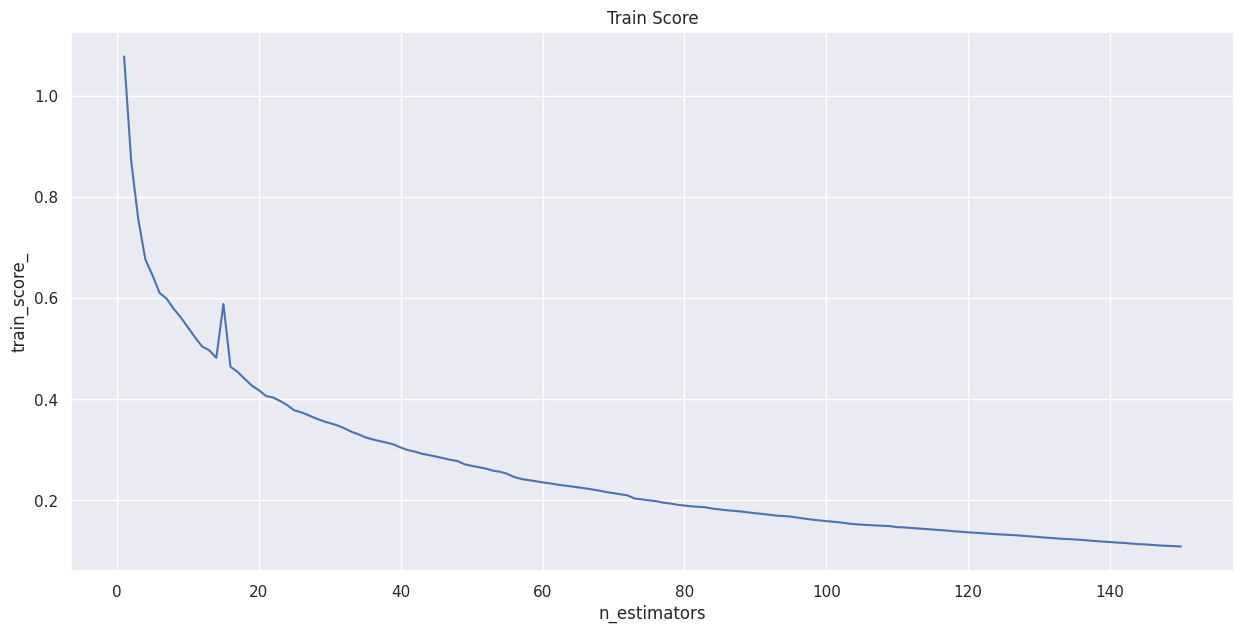

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(range(1, 151), gbc.train_score_)
plt.xlabel('n_estimators')
plt.ylabel('train_score_')
plt.title('Train Score')
plt.show()

In [ ]:
# subsample

samples = [1, 0.9, 0.8, 0.7, 0.6, 0.5]
for sample in samples:
    gbr = GradientBoostingClassifier(max_depth=1, n_estimators=10,
                                     subsample=sample,
                                     random_state=419)
    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    rmse = MSE(y_test, y_pred)**0.5
    print('subsample:', sample, ', 점수:', score,', RMSE:', rmse)

# subsample : 0.8

subsample: 1 , 점수: 0.7866666666666666 , RMSE: 0.46188021535170065
subsample: 0.9 , 점수: 0.7866666666666666 , RMSE: 0.46188021535170065
subsample: 0.8 , 점수: 0.8133333333333334 , RMSE: 0.43204937989385733
subsample: 0.7 , 점수: 0.7866666666666666 , RMSE: 0.46188021535170065
subsample: 0.6 , 점수: 0.8 , RMSE: 0.4472135954999579
subsample: 0.5 , 점수: 0.7866666666666666 , RMSE: 0.46188021535170065


In [ ]:
# 마지막 절차

# RandomSearchedCV
params = {'subsample':[0.75, 0.8, 0.85],
          'n_estimators':[10, 100, 1000],
          'learning_rate':[0.05, 0.075, 0.1],
          'max_depth':[3,4,5]}

from sklearn.model_selection import RandomizedSearchCV

gbc = GradientBoostingClassifier(max_depth=1, random_state=419)

# RandomizedSearchCV를 초기화합니다.
rand_clf = RandomizedSearchCV(gbc, params, n_iter=10,
                              cv=5, n_jobs=-1, random_state=419)
rand_clf.fit(X_train, y_train)
best_model = rand_clf.best_estimator_
best_params = rand_clf.best_params_
best_score = rand_clf.best_score_

print("최상의 매개변수:", best_params)
print("훈련 점수: {:.3f}".format(best_score))

y_pred = best_model.predict(X_test)
score = accuracy_score(y_pred, y_test)
rmse_test = MSE(y_test, y_pred)**0.5
print('점수: {:.3f}'.format(score))
print('RMSE: {:.3f}'.format(rmse_test))

최상의 매개변수: {'subsample': 0.85, 'n_estimators': 1000, 'max_depth': 4, 'learning_rate': 0.075}
훈련 점수: 0.827
점수: 0.743
RMSE: 0.507


# 5) XGBoost

In [ ]:
# 부스팅의 일반적인 아이디어는 약한 학습기를 반복적으로 오차를 개선하여 강한 학습기로 바꾸는 것

In [ ]:
# 경고 끄기
import warnings
warnings.filterwarnings('ignore')

# xgboost의 경고를 끄는 법
import xgboost as xgb
xgb.set_config(verbosity=0)

In [ ]:
data = data1

from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=419)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(225, 13) (225,) (75, 13) (75,)


In [ ]:
from xgboost import XGBClassifier

xg_clf = XGBClassifier(max_depth=2, n_estimators=50, eta=0.2,
                       subsample=0.8, random_state=419)
xg_clf.fit(X_train, y_train)
y_pred = xg_clf.predict(X_test)
score = accuracy_score(y_pred, y_test)

print('점수: ' + str(score))
print('RMSE: ', MSE(y_test, y_pred)**0.5)

점수: 0.7733333333333333
RMSE:  0.4760952285695233


In [ ]:
scores = cross_val_score(xg_clf, X, y, cv=5)
print('정확도: ', np.round(scores, 2))
print('정확도 평균 : %0.2f' %(scores.mean()))

정확도:  [0.83 0.85 0.8  0.82 0.77]
정확도 평균 : 0.81


<BarContainer object of 13 artists>

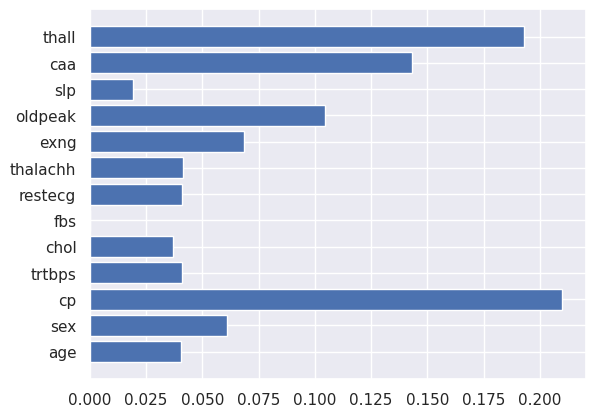

In [ ]:
# feature_importances
xg_clf.fit(X_train, y_train)
import matplotlib.pyplot as plt

plt.barh(X.columns, xg_clf.feature_importances_, align='center')

In [ ]:
y_pred = xg_clf.predict(X_test)
get_clf_eval(y_test, y_pred)
print(classification_report(y_test, y_pred))

오차 행렬
[[22 12]
 [ 5 36]]
정확도: 0.7733, 정밀도: 0.7500, 재현율: 0.8780,F1: 0.8090, AUC: 0.7626
              precision    recall  f1-score   support

           0       0.81      0.65      0.72        34
           1       0.75      0.88      0.81        41

    accuracy                           0.77        75
   macro avg       0.78      0.76      0.77        75
weighted avg       0.78      0.77      0.77        75



- hyperparameter tuning  (0419)



```
# 코드로 형식 지정됨
  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                 colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                 importance_type='gain', interaction_constraints='',
                 learning_rate=0.1, max_delta_step=0, max_depth=5,
                 min_child_weight=1, missing=nan, monotone_constraints='()',
                 n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
                 reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                 tree_method='exact', validate_parameters=1, verbosity=None)
```



- XGBoost의 사이킷런 API는  fit() 메서드의 eval_metric 매개변수에 측정 지표를 지정할 수 있다.
- 이진 분류일 경우 'logloss', 다중 분류일 경우 'mlogloss'
- eval_metric 매개변수를 지정할 경우, eval_set 매개변수에 평가할 데이터셋을 (특성,타깃) 튜플의 리스트로 전달해야합니다.

In [ ]:
xgb = XGBClassifier(n_estimators=5)  # n_estimators를 5로 지정해서 5번 돌아간다.
# 돌아갈수록 loss가 줄어든다.
xgb.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)])

[0]	validation_0-logloss:0.53482	validation_1-logloss:0.59449
[1]	validation_0-logloss:0.43880	validation_1-logloss:0.54086
[2]	validation_0-logloss:0.37237	validation_1-logloss:0.51589
[3]	validation_0-logloss:0.31197	validation_1-logloss:0.50301
[4]	validation_0-logloss:0.26872	validation_1-logloss:0.47761


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=5, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xgb.evals_result()

{'validation_0': OrderedDict([('logloss',
               [0.5348233689202203,
                0.4387983907593621,
                0.37237006617916957,
                0.3119691395097309,
                0.2687155406673749])]),
 'validation_1': OrderedDict([('logloss',
               [0.5944895652929941,
                0.5408597429593404,
                0.5158850260575613,
                0.5030102159579595,
                0.4776096632083257])])}

- booster = 'gbtree' : 어떤 부스트 구조를 쓸지 결정하는 것. / 의사결정기반 모형(gbtree)
- objective = 'binary::logistic' / 이진 분류의 기본 손실 함수
- max_depth : max_depth는 트리의 깊이를 지정.
- learning_rate  / xgboost에서는  eta라고 부름. 지정된 비율로 각 트리의 가중치를 감소시켜 분산을 억제
- n_estimations / 부스팅에 포함할 트리 개수 / learning_rate를 줄이고 이 값을 늘리면 더 높은 성능을 얻을 수 있음.

### StratifiedKFold
- 각 fold의 타깃 레이블의 비율을 동일하게 만듦.
- Fold를 나누기 전에 데이터를 섞기 위해 StratifiedKFold의 shuffle 매개변수(기본값 False)를 True로 지정하여 직접 StratifiedKFold의 객체를 만들어 cv 매개변수에 전달을 함.

In [ ]:
from sklearn.model_selection import StratifiedKFold

def grid_search(params, random=False):

  xgb = XGBClassifier(booster='gbtree', objective='binary:logistic',
                      random_state=2, verbosity=0, use_lael_encoder=False)

  kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

  if random:
    grid = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=20,
                              n_jobs=-1, random_state=2)
  else:
    grid = GridSearchCV(xgb, params, cv=kfold, n_jobs=-1)


  grid.fit(X,y)
  best_params = grid.best_params_
  best_score = grid.best_score_

  print("최상의 매개변수:", best_params)
  print("최상의 점수: {:.5f}".format(best_score))

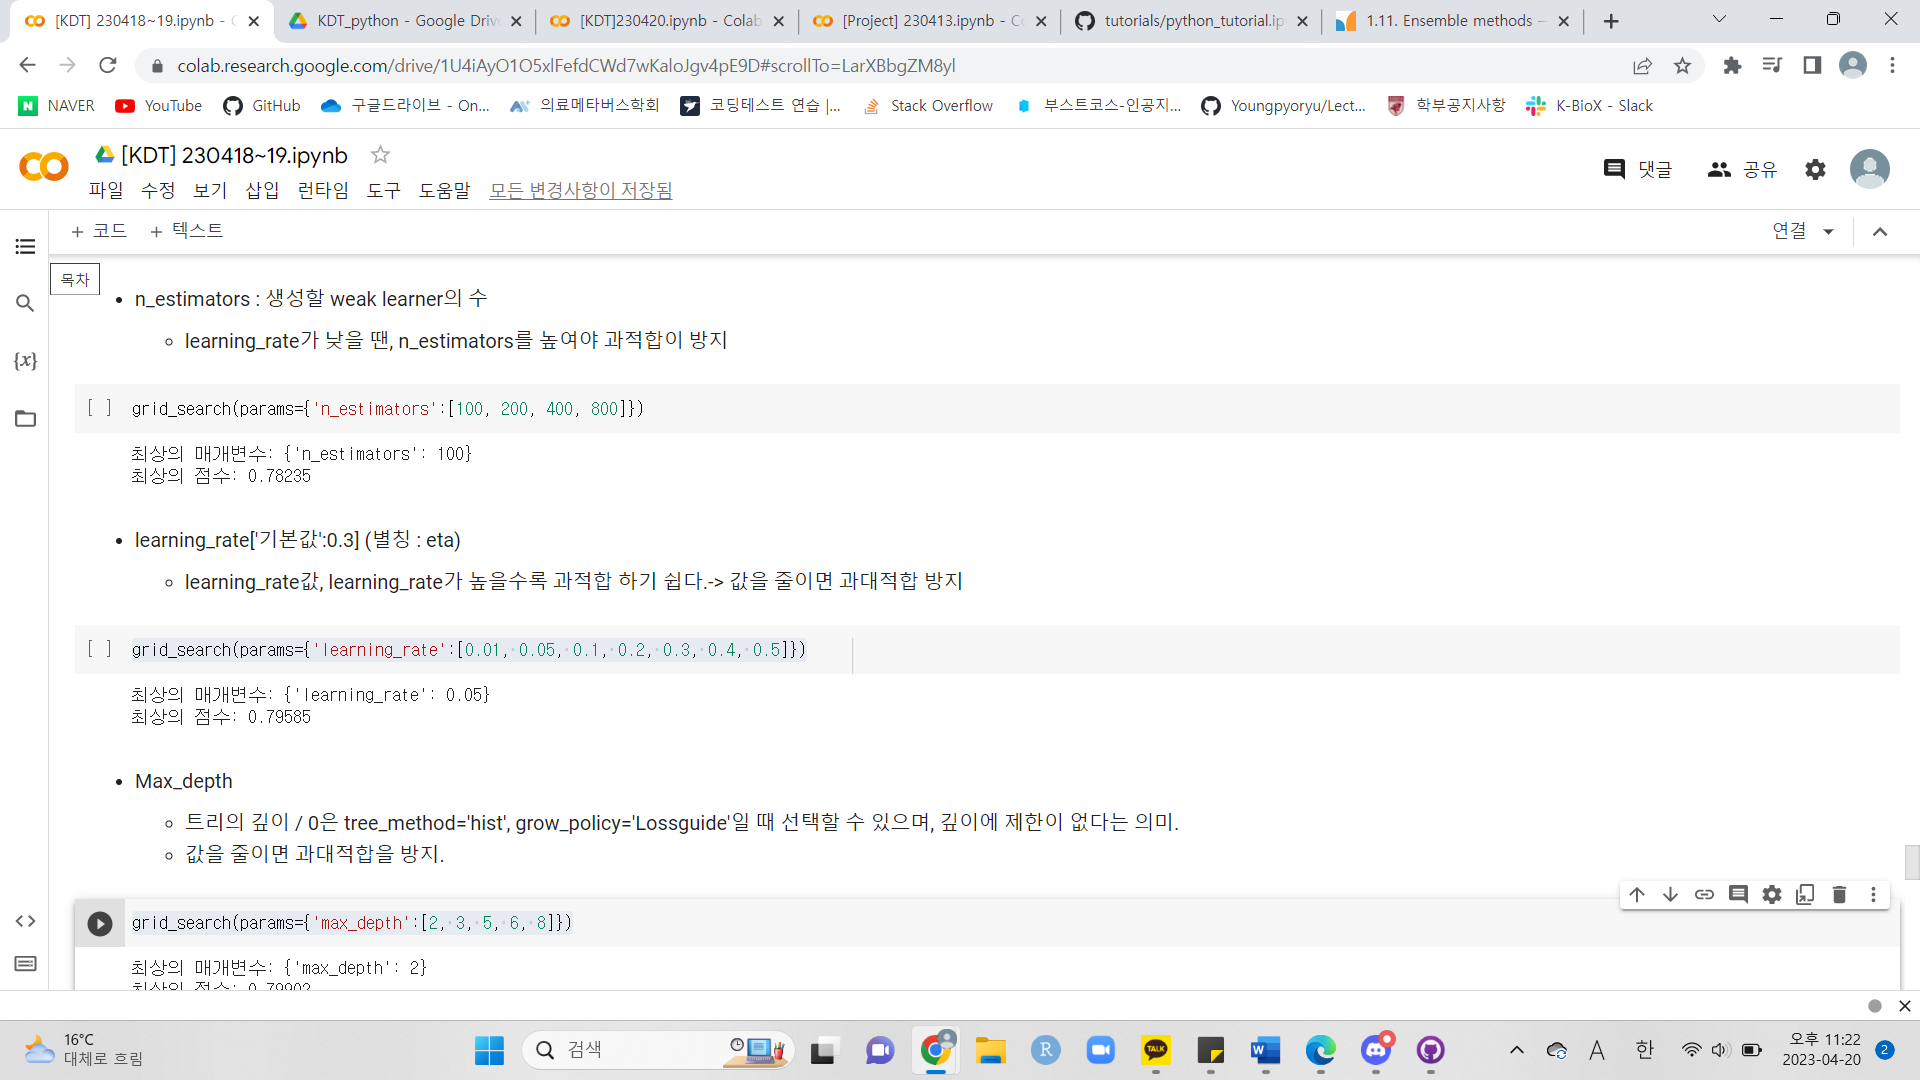

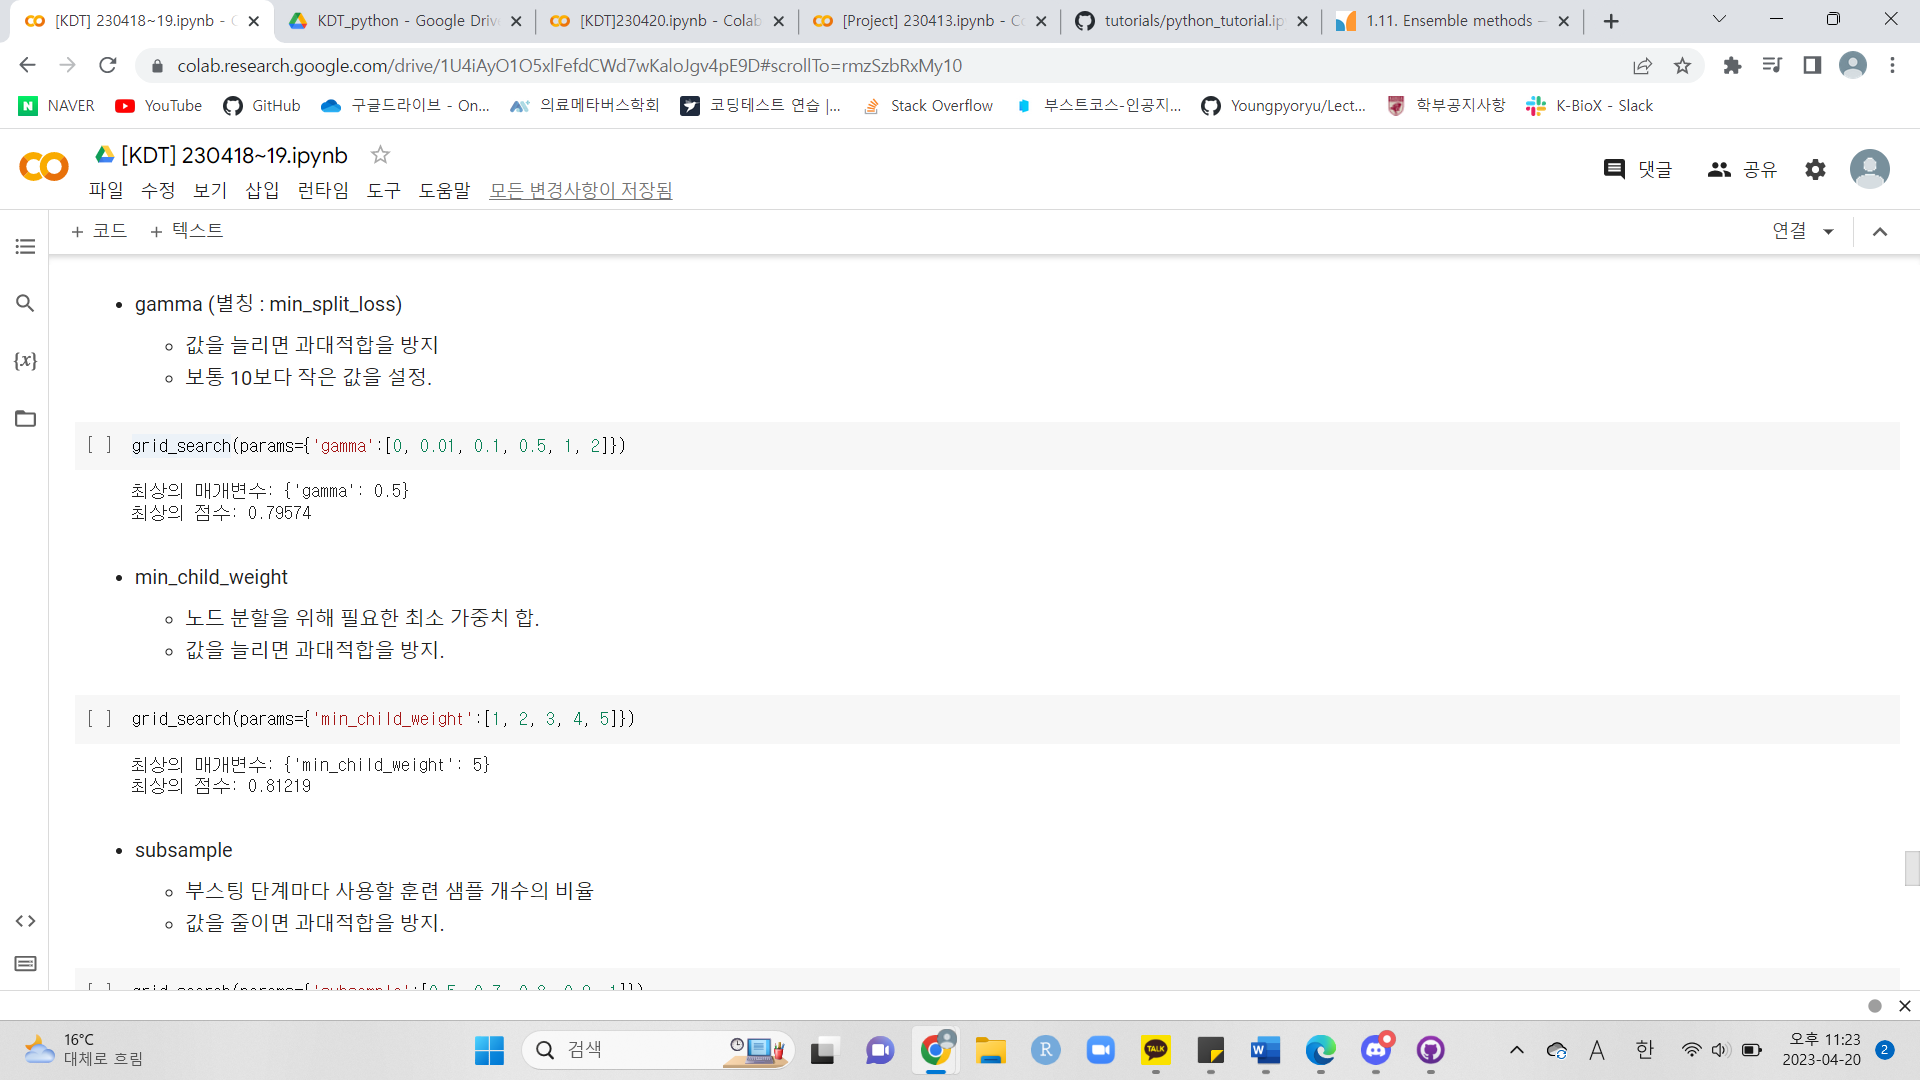

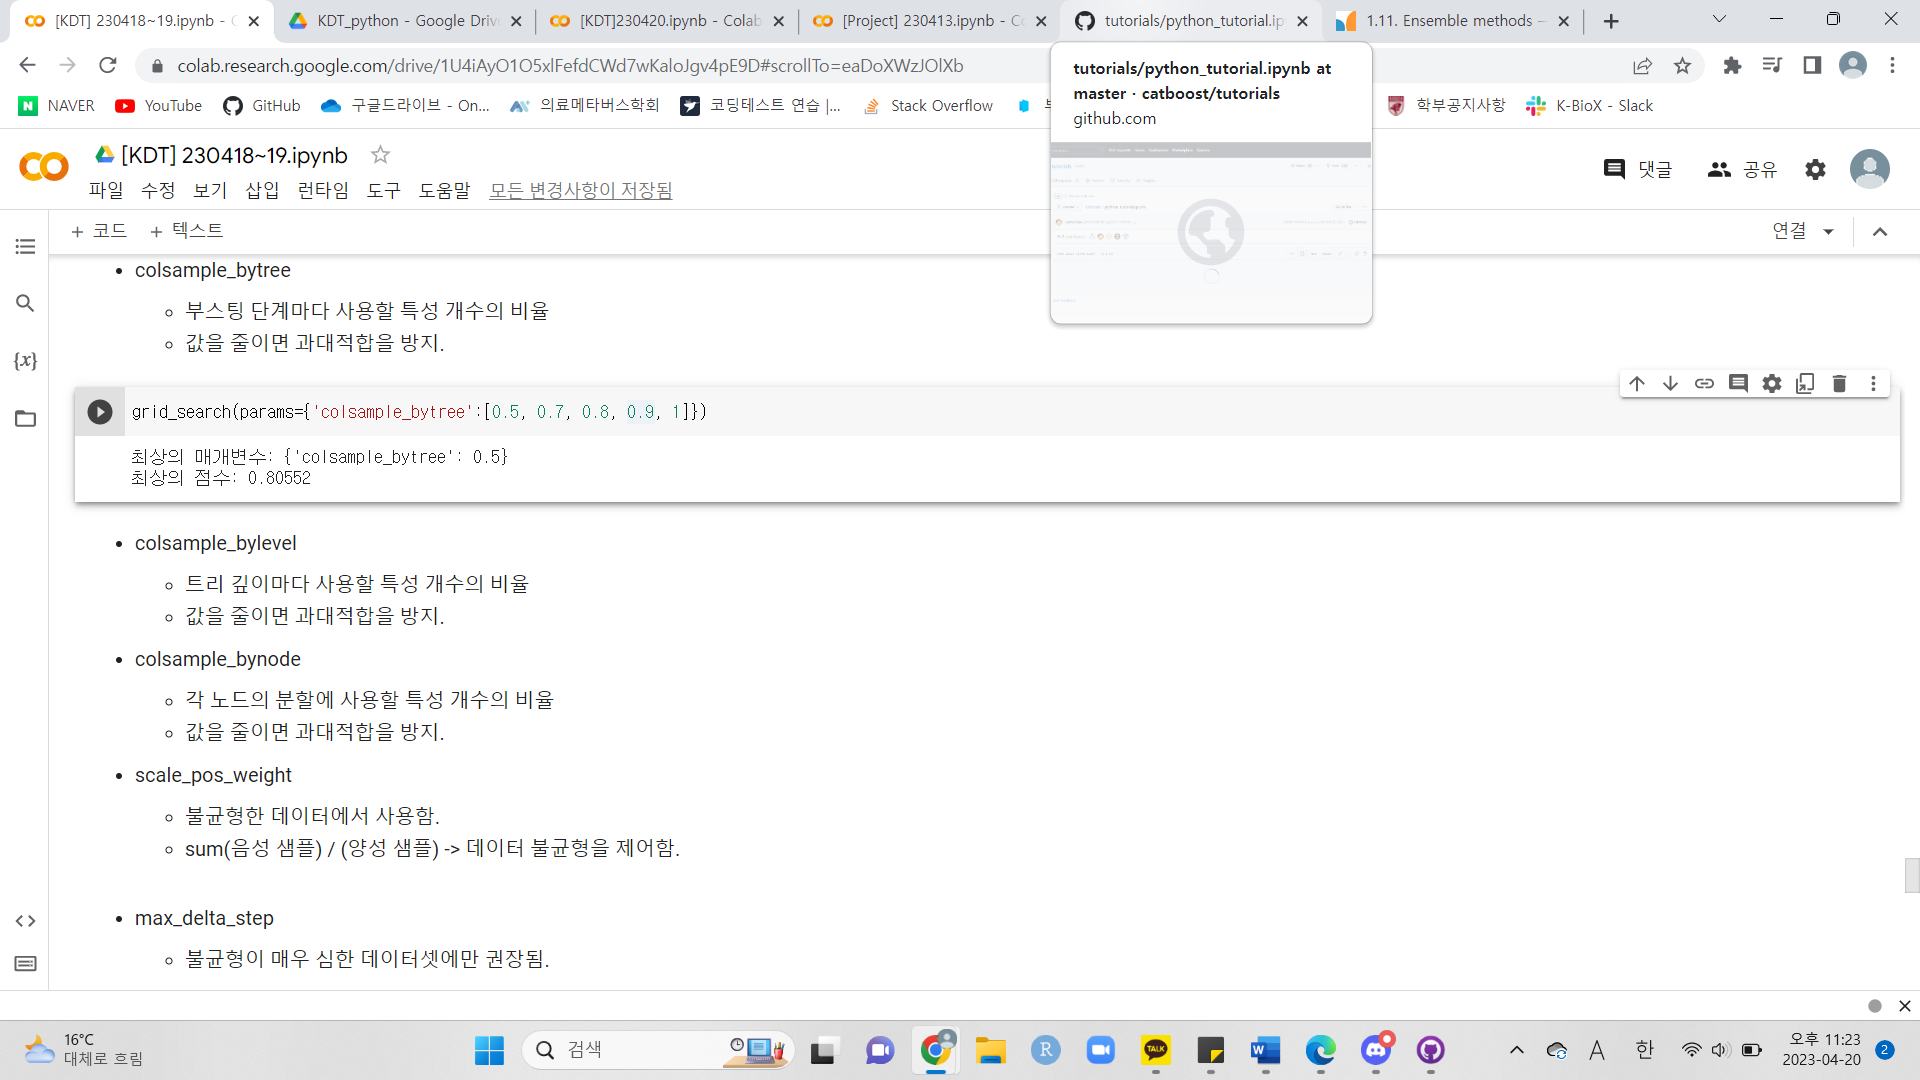

In [ ]:
# n_estimators
grid_search(params={'n_estimators':[2, 25, 50, 75, 100]})

최상의 매개변수: {'n_estimators': 100}
최상의 점수: 0.81667


In [ ]:
# + max_depth
grid_search(params={'max_depth':[1, 2, 3, 4, 6, 7, 8],
                    'n_estimators':[50]})

grid_search(params={'max_depth':[1, 2, 3, 4, 6, 7, 8],
                    'n_estimators':[2, 50, 100]})

In [ ]:
# + learning_rate
grid_search(params={'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
                    'max_depth':[1], 'n_estimators':[50]})

In [ ]:
# min_child_weight
grid_search(params={'min_child_weight':[1, 2, 3, 4, 5],
                    'max_depth':[1], 'n_estimators':[50]})

# + min_child_weight
grid_search(params={'min_child_weight':[1, 2, 3, 4, 5],
                    'learning_rate':[0.3],
                    'max_depth':[1], 'n_estimators':[50]})

In [ ]:
# subsample
grid_search(params={'subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'max_depth':[1], 'n_estimators':[50]})

grid_search(params={'subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'min_child_weight':[1, 2, 3, 4, 5],
                    'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5],
                    'max_depth':[1, 2, 3, 4, 5],
                    'n_estimators':[2]})

In [ ]:
# + subsample
grid_search(params={'subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'min_child_weight':[1],
                    'learning_rate':[0.3],
                    'max_depth':[1], 'n_estimators':[50]})

In [ ]:
# 하이퍼 파라미터 조정
grid_search(params={'subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'min_child_weight':[1, 2, 3, 4, 5],
                    'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5],
                    'max_depth':[1, 2, 3, 4, 5, None],
                    'n_estimators':[2, 25, 50, 75, 100]}, random=True)

In [ ]:
# early_stopping_rounds

model = XGBClassifier(booster='gbtree', objective='binary:logistic')
eval_set = [(X_test, y_test)]
eval_metric='error'
model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set,
          early_stopping_rounds=10, verbose=True)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('정확도: %.2f%%' %(accuracy*100.0))

# 4.1) Adaboost

  - Adaboost는 가중치를 부여한 약 분류기(Weak Classifier)를 모아서 최종적인 강 분류기(Strong Classifier)를 생성하는 기법
  - 새로운 트리가 이전 트리의 오차를 기반으로 가중치 조정
  - 오류 샘플의 가중치를 높여 잘못된 예측에 더 많은 주의를 기울임.
  - 실수에서 학습하기 때문에 약한 학습기를 강력한 학습기로 만들 수 있음.

In [ ]:
data = data1

from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=419)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(225, 13) (225,) (75, 13) (75,)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=50, random_state=419)

scores = cross_val_score(ada, X, y, cv=5)
print('정확도: ', np.round(scores, 2))
print('정확도 평균 : %0.2f' %(scores.mean()))

정확도:  [0.83 0.85 0.8  0.73 0.77]
정확도 평균 : 0.80


In [ ]:
score = accuracy_score(y_pred, y_test)
print('점수: ' + str(score))
print('RMSE: ', MSE(y_test, y_pred)**0.5)

점수: 0.72
RMSE:  0.5291502622129182


In [ ]:
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
get_clf_eval(y_test, y_pred)
print(classification_report(y_test, y_pred))

오차 행렬
[[18 16]
 [ 5 36]]
정확도: 0.7200, 정밀도: 0.6923, 재현율: 0.8780,F1: 0.7742, AUC: 0.7037
              precision    recall  f1-score   support

           0       0.78      0.53      0.63        34
           1       0.69      0.88      0.77        41

    accuracy                           0.72        75
   macro avg       0.74      0.70      0.70        75
weighted avg       0.73      0.72      0.71        75



In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.1 MB/s eta 0:00:00


# 6) LGBMClassifier

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = data1

from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=419)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(225, 13) (225,) (75, 13) (75,)


In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(num_leaves=31,
                      objective='binary',
                      learning_rate=0.2, n_estimators=50,
                      subsample=0.8,
                      # verbose=0,
                      n_jobs=-1,
                      random_state=419
                      )

lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('점수: ' + str(score))
print('RMSE: ', MSE(y_test, y_pred)**0.5)

점수: 0.7733333333333333
RMSE:  0.4760952285695233


In [ ]:
scores = cross_val_score(lgbm, X, y, cv=5)
print('정확도: ', np.round(scores, 2))
print('정확도 평균 : %0.2f' %(scores.mean()))

정확도:  [0.83 0.87 0.8  0.73 0.77]
정확도 평균 : 0.80


In [ ]:
get_clf_eval(y_test, y_pred)
print(classification_report(y_test, y_pred))

오차 행렬
[[23 11]
 [ 6 35]]
정확도: 0.7733, 정밀도: 0.7609, 재현율: 0.8537,F1: 0.8046, AUC: 0.7651
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        34
           1       0.76      0.85      0.80        41

    accuracy                           0.77        75
   macro avg       0.78      0.77      0.77        75
weighted avg       0.78      0.77      0.77        75



<BarContainer object of 13 artists>

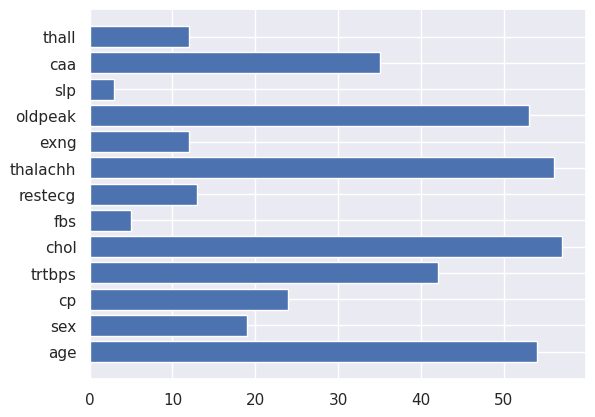

In [ ]:
lgbm.fit(X_train, y_train)
import matplotlib.pyplot as plt

plt.barh(X.columns, lgbm.feature_importances_, align='center')

# 7) CatBoostClassifier

In [ ]:
!pip install CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement CatBoostClassifier (from versions: none)
ERROR: No matching distribution found for CatBoostClassifier


In [ ]:
data = data1

from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=419)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(225, 13) (225,) (75, 13) (75,)


In [ ]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier(iterations=2,
                            learning_rate=0.8, depth=2,
                            random_state=419)

cb_clf.fit(X_train, y_train)
y_pred = cb_clf.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('점수: ' + str(score))
print('RMSE: ', MSE(y_test, y_pred)**0.5)

ModuleNotFoundError: ignored

In [ ]:
scores = cross_val_score(cb_clf, X, y, cv=5)
print('정확도: ', np.round(scores, 2))
print('정확도 평균 : %0.2f' %(scores.mean()))

NameError: ignored

In [ ]:
get_clf_eval(y_test, y_pred)
print(classification_report(y_test, y_pred))

오차 행렬
[[24 10]
 [ 7 34]]
정확도: 0.7733, 정밀도: 0.7727, 재현율: 0.8293,F1: 0.8000, AUC: 0.7676
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        34
           1       0.77      0.83      0.80        41

    accuracy                           0.77        75
   macro avg       0.77      0.77      0.77        75
weighted avg       0.77      0.77      0.77        75



# 8) Voting

- 서로 다른 알고리즘을 가진 분류기가 같은 데이터셋을 기반으로 학습

> Bagging
  - 같은 알고리즘 유형의 모델들의 학습 데이터셋이 다르다.

- 모델 최적화를 끝낸 후 데이터에 맞는 최적의 모델을 선택함.

In [ ]:
data = data1

from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=419)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(225, 13) (225,) (75, 13) (75,)


In [ ]:
from sklearn.ensemble import VotingClassifier

vt = VotingClassifier()

In [ ]:
data = data1

from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

print(X.shape, y.shape)

(300, 13) (300,)


In [ ]:
from sklearn import tree, linear_model, neighbors, naive_bayes, ensemble
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [ ]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),

    #Nearest Neighbor
    KNeighborsClassifier(),

    #Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    XGBClassifier(verbose=0),
    LGBMClassifier(verbose=0),
    CatBoostClassifier(verbose=0)]

In [ ]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )
# run model 10x with 60/30 split intentionally leaving out 10%
# K-fold 같이. 10%를 매번 빼서 split을 하기 때문에 더 중복없이 뽑는 느낌..?

MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

MLA_predict = y

row_index = 0
for alg in MLA:
  MLA_name = alg.__class__.__name__
  MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
  MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

  cv_results = model_selection.cross_validate(alg, X, y, cv  = cv_split,return_train_score=True)

  MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
  MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
  MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()

  MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!

  alg.fit(X, y)  # ? train으로 말고 전체 데이터로 fit?
  # MLA_predict[MLA_name] = alg.predict(X)  # ? 전체 데이터로 predict?
  # y가 (301,)가 되는 이유가 이 코드 때문에?

  row_index+=1

MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
6,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': N...",0.85,0.864444,0.069602,0.008294
5,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.853889,0.856667,0.080898,0.858374
13,CatBoostClassifier,{'verbose': 0},0.997778,0.854444,0.095975,1.338074
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",1.0,0.851111,0.089691,0.262273
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",1.0,0.84,0.093333,0.139189
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.999444,0.823333,0.122429,0.11422
11,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",1.0,0.821111,0.099387,0.041653
12,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",0.997778,0.816667,0.106719,0.078575
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': 'de...",0.953889,0.794444,0.07188,0.090459
1,BaggingClassifier,"{'base_estimator': 'deprecated', 'bootstrap': ...",0.987222,0.793333,0.100222,0.024394


In [ ]:
# print(X.shape, y.shape)

(300, 13) (301,)


Text(0, 0.5, 'Algorithm')

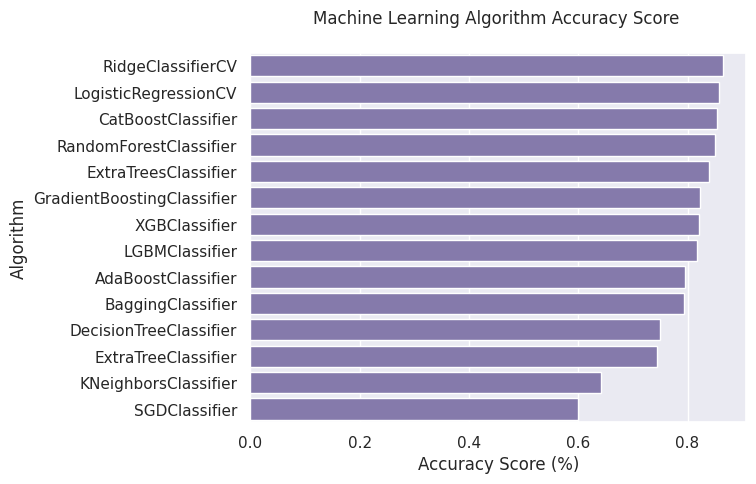

In [ ]:
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

****

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

def randomized_search_clf(params, runs=20, clf=DecisionTreeClassifier(random_state=2)):
  rand_clf = RandomizedSearchCV(clf, params, n_iter=runs,
                                cv=5, n_jobs=-1, random_state=2)
  rand_clf.fit(X_train, y_train)
  best_model = rand_clf.best_estimator_
  best_score = rand_clf.best_score_

  y_pred = best_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  print('훈련 점수: {:.3f}'.format(best_score))
  print('테스트 점수: {:.3f}'.format(accuracy))

  return best_model

In [ ]:
# hyperparameter tuning
randomized_search_clf(
    params={
        'criterion':['entropy', 'gini'],
        'splitter':['random', 'best'],
        'min_samples_split':[2,3,4,5,6,8,10],
        'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
        'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
        'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
        'max_features':['sqrt', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
        'max_depth':[None, 2,4,6,8],
        'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
    })

In [ ]:
best_model.fit(X,y)

In [ ]:
scores = cross_val_score(best_model, X_test, y_test, cv=5)
print('정확도:', np.round(scores, 2))
print('정확도 평균: %0.2f' %scores.mean())

In [ ]:
# feature_importances
best_model.fit(X_train,y_train)
import matplotlib.pyplot as plt

plt.barh(X.columns, best_model.feature_importances_, align='center')